In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# Load data
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)
# Normalize intensity of images to make it in the range [0,1] since 255 is the max (white).
X = X / 255.0

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
print(X.shape)

(70000, 784)


In [2]:
# Split the data into train/test sets
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

classifier = MLPClassifier(
    hidden_layer_sizes=(50,20,10),
    max_iter=3000,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)
# fit the model on the training data
classifier.fit(X_train, y_train)

Iteration 1, loss = 0.42635367
Iteration 2, loss = 0.15133481
Iteration 3, loss = 0.11926082
Iteration 4, loss = 0.10128421
Iteration 5, loss = 0.08698448
Iteration 6, loss = 0.08018627
Iteration 7, loss = 0.07544472
Iteration 8, loss = 0.06650726
Iteration 9, loss = 0.06502276
Iteration 10, loss = 0.05670472
Iteration 11, loss = 0.05228727
Iteration 12, loss = 0.05194876
Iteration 13, loss = 0.04580530
Iteration 14, loss = 0.04507070
Iteration 15, loss = 0.04141424
Iteration 16, loss = 0.03988480
Iteration 17, loss = 0.03980626
Iteration 18, loss = 0.03593785
Iteration 19, loss = 0.03619045
Iteration 20, loss = 0.03170852
Iteration 21, loss = 0.03625169
Iteration 22, loss = 0.03059689
Iteration 23, loss = 0.02845172
Iteration 24, loss = 0.02644720
Iteration 25, loss = 0.03089324
Iteration 26, loss = 0.02667141
Iteration 27, loss = 0.03008516
Iteration 28, loss = 0.03015542
Iteration 29, loss = 0.02441192
Iteration 30, loss = 0.02483432
Iteration 31, loss = 0.02515676
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(50, 20, 10), learning_rate_init=0.1,
              max_iter=3000, random_state=1, solver='sgd', verbose=10)

In [3]:
print("Training set score: %f" % classifier.score(X_train, y_train))
print("Test set score: %f" % classifier.score(X_test, y_test))

Training set score: 0.997700
Test set score: 0.968400


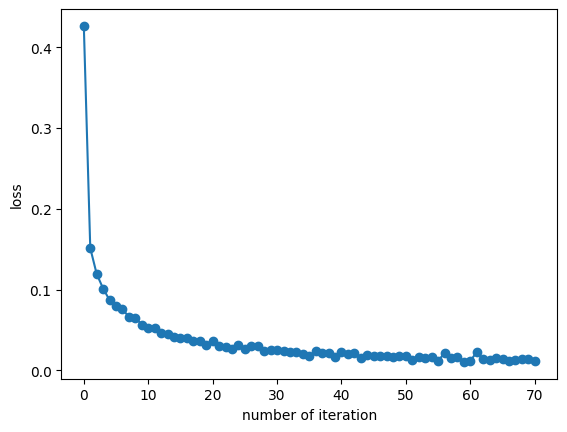

In [4]:
fig, axes = plt.subplots(1, 1)
axes.plot(classifier.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()

In [5]:
len(classifier.intercepts_) == len(classifier.coefs_) == 4

True

In [6]:
import numpy as np

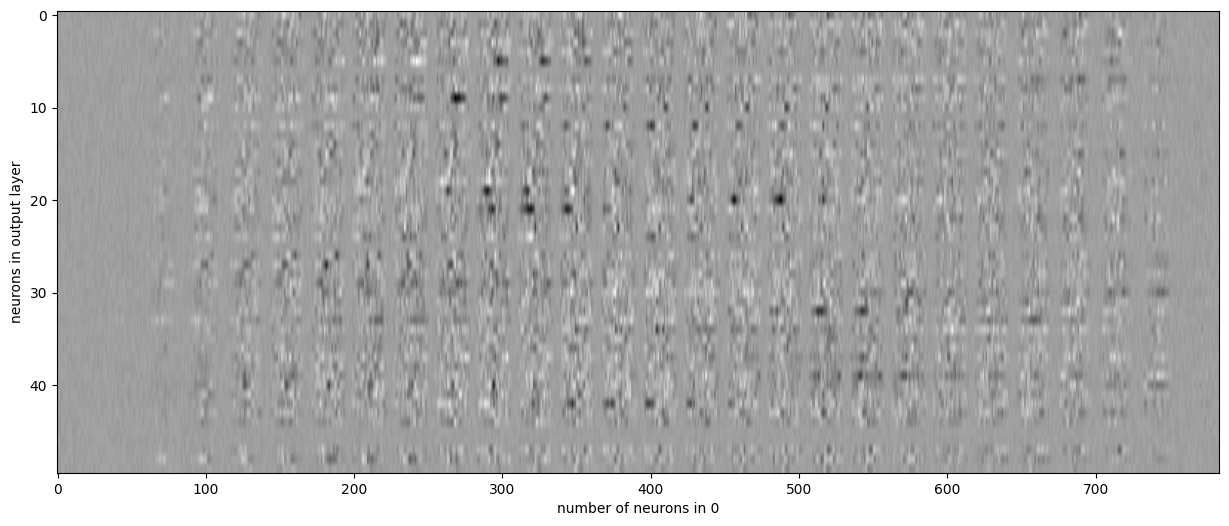

In [7]:
target_layer = 0 #0 is input, 1 is 1st hidden etc
fig, axes = plt.subplots(1, 1, figsize=(15,6))
axes.imshow(np.transpose(classifier.coefs_[target_layer]), cmap=plt.get_cmap("gray"), aspect="auto")
axes.set_xlabel(f"number of neurons in {target_layer}")
axes.set_ylabel("neurons in output layer")
plt.show()

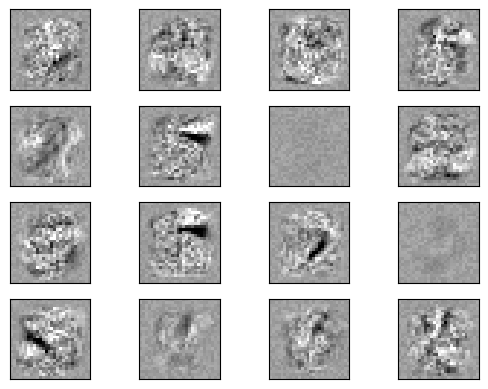

In [8]:
# choose layer to plot
target_layer = 0 #0 is input, 1 is 1st hidden etc
fig, axes = plt.subplots(4, 4)
vmin, vmax = classifier.coefs_[0].min(), classifier.coefs_[target_layer].max()
for coef, ax in zip(classifier.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

In [ ]:
x